# Sea Ice example notebook for seasonal cycle

To plot the seasonal cycle, follow the same calculation steps as for the time series, but specify `get_seasonal_cycle=True` in the `compute_seaice` method.

In [1]:
from aqua.diagnostics import SeaIce, PlotSeaIce, Plot2DSeaIce

/LUMI_TYKKY_Z6kXmtP/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


## Seaice extent seasonal cycle

### Calculate: model data surface extent 

In [ ]:
method   = 'extent'   # This is the method we want to compute with the seaice data
varname  = 'siconc'   # This is the right variable name relative to the desired method for IFS-NEMO
source   = 'lra-r100-monthly' # source name can change depending on the model and exp
regions_domain = ['arctic','antarctic']
regrid='r100'
loglevel = 'info'

seaice_model = SeaIce(model='IFS-NEMO', exp='historical-1990', source=source, regions=regions_domain, 
                      startdate='1991-01-01', enddate='2000-01-01', 
                      regrid=regrid, loglevel='info')
simod = seaice_model.compute_seaice(method=method, var=varname, 
                                    get_seasonal_cycle=True)

2025-09-23 15:45:49 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-09-23 15:45:49 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-09-23 15:45:49 :: Fixer :: INFO     -> No fixer_name found, only convention will be applied
2025-09-23 15:45:49 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-09-23 15:45:49 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-09-23 15:45:49 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-09-23 15:45:58 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 15:45:58 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 15:45:59 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 15:45:59 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 15:45:59 :: Regridder :: IN

### Calculate: reference sea ice surface extent

In [ ]:
#Reference data
model='OSI-SAF'
exp='osi-450'

print('RETRIEVED DATA: OSI-SAF nh-monthly')

#NH
seaice_ref_nh = SeaIce(model=model, exp=exp, source='nh-monthly', regions='arctic',
                       startdate='1991-01-01', enddate='2000-01-01', regrid='r100', loglevel=loglevel)
siext_ref_nh, siext_std_ref_nh = seaice_ref_nh.compute_seaice(method='extent', var='siconc',
                                                              calc_std_freq='monthly',
                                                              get_seasonal_cycle=True)
print('RETRIEVED DATA: OSI-SAF sh-monthly')
#SH
seaice_ref_sh = SeaIce(model=model, exp=exp, source='sh-monthly', regions='antarctic',
                       startdate='1991-01-01', enddate='2000-01-01', regrid='r100', loglevel=loglevel)
siext_ref_sh, siext_std_ref_sh = seaice_ref_sh.compute_seaice(method='extent', var='siconc',  
                                                              calc_std_freq='monthly',
                                                              get_seasonal_cycle=True)

2025-09-23 15:47:40 :: ConfigPath :: INFO     -> OSI-SAF_osi-450_nh-monthly triplet found in in obs!


RETRIEVED DATA: OSI-SAF nh-monthly


2025-09-23 15:47:41 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-09-23 15:47:41 :: Fixer :: INFO     -> Fix names in metadata is OSI-SAF-default
2025-09-23 15:47:41 :: Fixer :: INFO     -> Fix names OSI-SAF-default found in fixes files
2025-09-23 15:47:41 :: Reader :: INFO     -> Grid metadata is osi-saf-nh
2025-09-23 15:47:41 :: Regridder :: INFO     -> Grid name: osi-saf-nh
2025-09-23 15:47:41 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_osi-saf-nh.nc.
2025-09-23 15:47:41 :: CoordIdentifier :: WARNING  -> Multiple latitude coordinates found: ['lat', 'yc']. Disabling data model check for this coordinate.
2025-09-23 15:47:41 :: CoordIdentifier :: WARNING  -> Multiple longitude coordinates found: ['lon', 'xc']. Disabling data model check for this coordinate.
2025-09-23 15:47:41 :: CoordTransformer :: INFO     -> Grid type: Unknown
2025-09-23 15:47:41 :: CoordTransformer :: INFO     -> Tar

RETRIEVED DATA: OSI-SAF sh-monthly


2025-09-23 15:47:42 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-09-23 15:47:42 :: Fixer :: INFO     -> Fix names in metadata is OSI-SAF-default
2025-09-23 15:47:42 :: Fixer :: INFO     -> Fix names OSI-SAF-default found in fixes files
2025-09-23 15:47:43 :: Reader :: INFO     -> Grid metadata is osi-saf-sh
2025-09-23 15:47:43 :: Regridder :: INFO     -> Grid name: osi-saf-sh
2025-09-23 15:47:43 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_osi-saf-sh.nc.
2025-09-23 15:47:43 :: CoordIdentifier :: WARNING  -> Multiple latitude coordinates found: ['lat', 'yc']. Disabling data model check for this coordinate.
2025-09-23 15:47:43 :: CoordIdentifier :: WARNING  -> Multiple longitude coordinates found: ['lon', 'xc']. Disabling data model check for this coordinate.
2025-09-23 15:47:43 :: CoordTransformer :: INFO     -> Grid type: Unknown
2025-09-23 15:47:43 :: CoordTransformer :: INFO     -> Tar

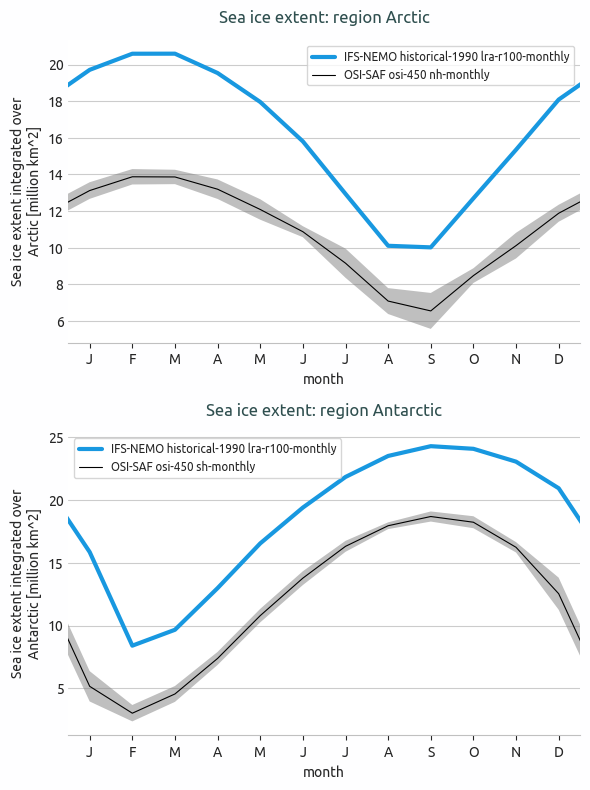

In [6]:
psi = PlotSeaIce(monthly_models=simod,
                 monthly_ref=[siext_ref_nh, siext_ref_sh],
                 monthly_std_ref=[siext_std_ref_nh, siext_std_ref_sh],
                 )
psi.plot_seaice(plot_type='seasonal_cycle', save_pdf=False, save_png=False)

## Seaice volume seasonal cycle

### Calculate: model data volume 

In [2]:
method   = 'volume'    # This is the method we want to compute with the seaice data
varname  = 'sithick'   # This is the right variable name relative to the desired method for IFS-NEMO
source   = 'lra-r100-monthly'
regions_domain = ['arctic','antarctic']
regrid='r100'
loglevel = 'info'

seaice_model = SeaIce(model='IFS-NEMO', exp='historical-1990', source=source, regions=regions_domain,
                      startdate='1991-01-01', enddate='2000-01-01',
                      regrid=regrid, loglevel=loglevel)
simod = seaice_model.compute_seaice(method=method, var=varname, 
                                    get_seasonal_cycle=True)

# Reference data
varn = 'sivol'

seaice_ref_nh = SeaIce(model='PSC', exp='PIOMAS', source='monthly', regions='arctic',
                       startdate='1991-01-01', enddate='2000-01-01',
                       regrid=regrid, loglevel=loglevel)
si_ref_nh, si_std_ref_nh = seaice_ref_nh.compute_seaice(method=method, var=varn, 
                                                        calc_std_freq='monthly', 
                                                        get_seasonal_cycle=True)

seaice_ref_sh = SeaIce(model='PSC', exp='GIOMAS', source='monthly', regions='antarctic',
                       startdate='1991-01-01', enddate='2000-01-01', 
                       regrid=regrid, loglevel=loglevel)
si_ref_sh, si_std_ref_sh = seaice_ref_sh.compute_seaice(method=method, var=varn, 
                                                        calc_std_freq='monthly', 
                                                        get_seasonal_cycle=True)

2025-09-23 16:28:31 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-09-23 16:28:32 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-09-23 16:28:32 :: Fixer :: INFO     -> No fixer_name found, only convention will be applied
2025-09-23 16:28:32 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-09-23 16:28:32 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-09-23 16:28:32 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-09-23 16:28:42 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 16:28:42 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 16:28:42 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 16:28:42 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-09-23 16:28:42 :: Regridder :

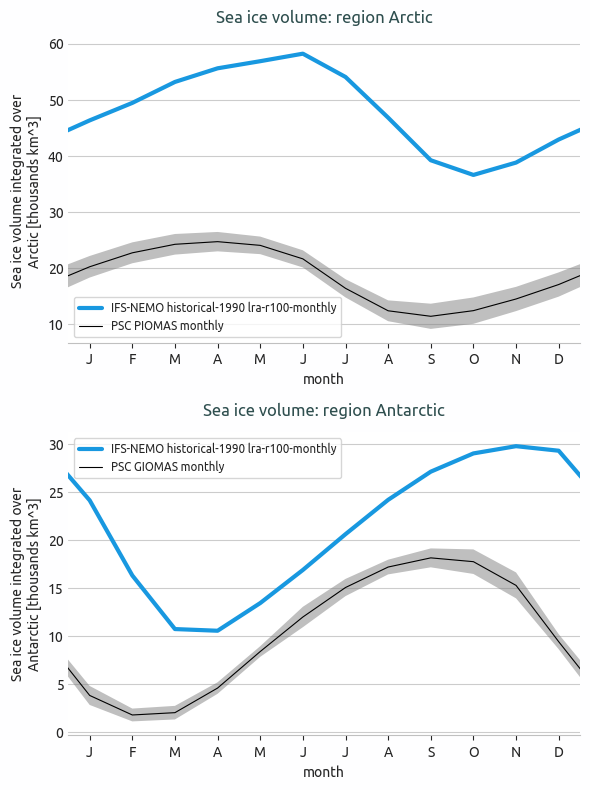

In [4]:
psi = PlotSeaIce(monthly_models=simod,
                 monthly_ref=[si_ref_nh, si_ref_sh],
                 monthly_std_ref=[si_std_ref_nh, si_std_ref_sh],
                 )
psi.plot_seaice(plot_type='seasonal_cycle', save_pdf=False, save_png=False)